# Bond scans



In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pyscf import gto, scf, mp, ci
import py3Dmol

In [2]:
HARTREE2KCALMOL = 627.5094737775374055927342256

## H2



In [3]:
def get_h2_string(r=0.72):
    atom_string = f"""
    H
    H  1  {r}
    """
    return atom_string

In [4]:
mol_h2 = gto.Mole()
mol_h2.atom = get_h2_string()
mol_h2.unit = "Angstrom"
mol_h2.basis = "aug-cc-pvtz"
mol_h2.charge = 0
mol_h2.spin = 0
mol_h2.verbose = 1

mol_h2.build()

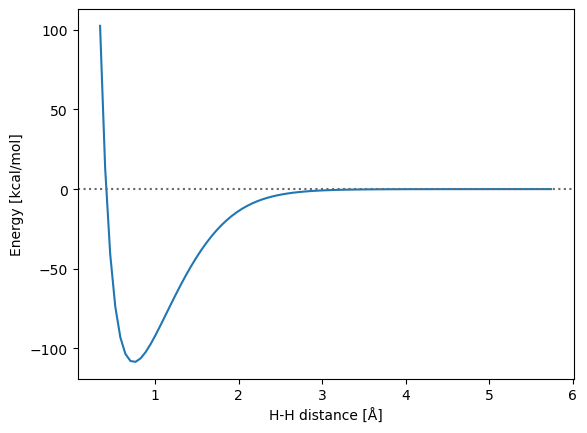

In [5]:
r_h2_eq = 0.74
r_h2_scan = np.linspace(r_h2_eq - 0.4, r_h2_eq + 5, num=90)
r_h2_energies = np.empty(r_h2_scan.shape)

for i, r_h2 in enumerate(r_h2_scan):
    mol_h2.atom = get_h2_string(r=r_h2)
    mol_h2.build()
    mf = scf.RHF(mol_h2)
    mf.conv_tol = 1e-12
    mf.run()
    mycc = ci.CISD(mf)
    mycc.run()
    r_h2_energies[i] = mycc.e_tot

# Convert to kcal/mol and normalize from farthest
r_h2_energies *= HARTREE2KCALMOL
r_h2_energies -= r_h2_energies[-1]

plt.plot(r_h2_scan, r_h2_energies)
plt.xlabel("H-H distance [Å]")
plt.ylabel("Energy [kcal/mol]")
plt.axhline(y=0, color="dimgrey", linestyle=":")

df = pd.DataFrame({"r": r_h2_scan, "e": r_h2_energies})
df.to_csv("h2-scan.csv", index=False)

## Methanol

In [6]:
def get_atom_string(
    r_ch=1.0823, r_co=1.4144, r_oh=0.9578, a_och=106.79, a_coh=107.59, d_hcoh=180.00
):
    atom_string = f"""
    H
    H  1  1.7577
    H  1  1.7577  2  60.43
    C  1  {r_ch}  2  36.02    3  323.22
    O  4  {r_co}  1  {a_och}  2  238.84
    H  5  {r_oh}  4  {a_coh}  1  {d_hcoh}
    """
    return atom_string

In [7]:
mol = gto.Mole()
mol.atom = get_atom_string()
mol.unit = "Angstrom"
mol.basis = "cc-pvtz"
mol.verbose = 1

mol.build()

### O-H bond

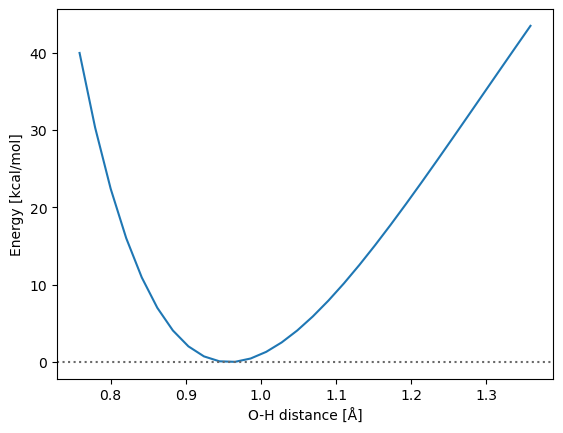

In [8]:
r_oh_eq = 0.9587
r_oh_scan = np.linspace(r_oh_eq - 0.2, r_oh_eq + 0.4, num=30)
r_oh_energies = np.empty(r_oh_scan.shape)

for i, r_oh in enumerate(r_oh_scan):
    mol.atom = get_atom_string(r_oh=r_oh)
    mol.build()
    mf = scf.RHF(mol)
    mf.conv_tol = 1e-12
    mf.run()
    mp2 = mp.MP2(mf)
    mp2.conv_tol = 1e-12
    mp2.run()
    r_oh_energies[i] = mp2.e_tot_scs

# Convert to kcal/mol and normalize from farthest
r_oh_energies *= HARTREE2KCALMOL
r_oh_energies -= np.min(r_oh_energies)

df = pd.DataFrame({"r": r_oh_scan, "e": r_oh_energies})
df.to_csv("meoh-oh-scan.csv", index=False)

### C-O


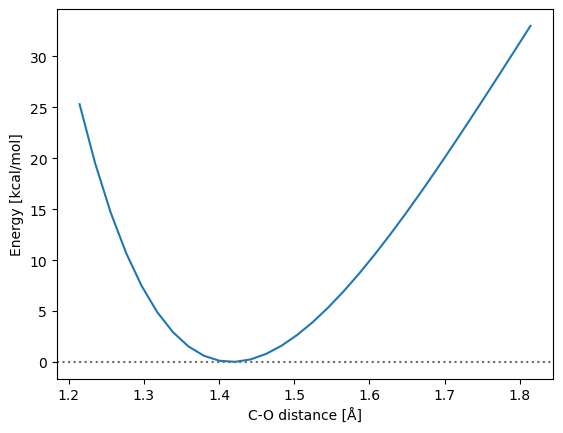

In [9]:
r_co_eq = 1.4144
r_co_scan = np.linspace(r_co_eq - 0.2, r_co_eq + 0.4, num=30)
r_co_energies = np.empty(r_co_scan.shape)

for i, r_co in enumerate(r_co_scan):
    mol.atom = get_atom_string(r_co=r_co)
    mol.build()
    mf = scf.RHF(mol)
    mf.conv_tol = 1e-12
    mf.run()
    mp2 = mp.MP2(mf)
    mp2.conv_tol = 1e-12
    mp2.run()
    r_co_energies[i] = mp2.e_tot_scs

# Convert to kcal/mol and normalize from farthest
r_co_energies *= HARTREE2KCALMOL
r_co_energies -= np.min(r_co_energies)

df = pd.DataFrame({"r": r_co_scan, "e": r_co_energies})
df.to_csv("meoh-co-scan.csv", index=False)

### C-H

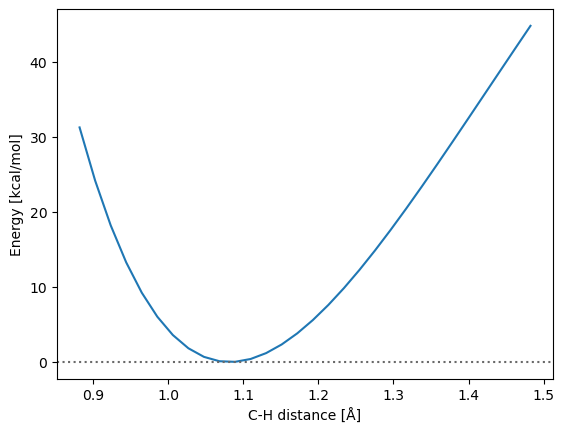

In [10]:
r_ch_eq = 1.0823
r_ch_scan = np.linspace(r_ch_eq - 0.2, r_ch_eq + 0.4, num=30)
r_ch_energies = np.empty(r_ch_scan.shape)

for i, r_ch in enumerate(r_ch_scan):
    mol.atom = get_atom_string(r_ch=r_ch)
    mol.build()
    mf = scf.RHF(mol)
    mf.conv_tol = 1e-12
    mf.run()
    mp2 = mp.MP2(mf)
    mp2.conv_tol = 1e-12
    mp2.run()
    r_ch_energies[i] = mp2.e_tot_scs

# Convert to kcal/mol and normalize from farthest
r_ch_energies *= HARTREE2KCALMOL
r_ch_energies -= np.min(r_ch_energies)

df = pd.DataFrame({"r": r_ch_scan, "e": r_ch_energies})
df.to_csv("meoh-ch-scan.csv", index=False)

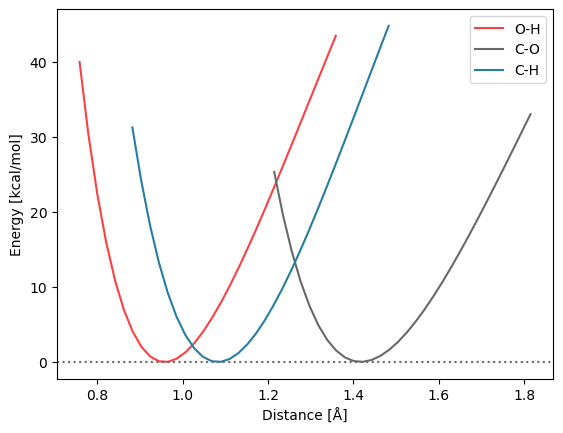

In [15]:
plt.plot(r_oh_scan, r_oh_energies, color="#f94144", label="O-H")
plt.plot(r_co_scan, r_co_energies, color="dimgrey", label="C-O")
plt.plot(r_ch_scan, r_ch_energies, color="#277da1", label="C-H")
plt.xlabel("Distance [Å]")
plt.ylabel("Energy [kcal/mol]")
plt.axhline(y=0, color="dimgrey", linestyle=":")
plt.legend()

## Bond orders

In [16]:
def get_ethane_string(r_cc=1.5214):
    atom_string = f"""
    H
    H  1  1.7635
    H  1  1.7635  2  60.00
    C  1  1.0878  2  35.85  3  36.95
    C  4  {r_cc}  1  110.61  2  121.37
    H  5  1.0878  4  110.61  1  300.00
    H  5  1.0878  4  110.61  1  60.00
    H  5  1.0878  4  110.61  1  180.00
    """
    return atom_string


def get_ethene_string(r_cc=1.3164):
    atom_string = f"""
    H
    H  1  1.8280
    C  2  1.0778  1  32.00
    C  3  {r_cc}  2  122.00  1  180.00
    H  4  1.0778  3  122.00  2  180.00
    H  4  1.0778  3  122.00  2  0.00
    """
    return atom_string


def get_ethyne_string(r_cc=1.1938):
    atom_string = f"""
    H
    C  1  1.0497
    C  2  {r_cc}  1  179.97
    H  3  1.0497  2  179.97  1  179.09
    """
    return atom_string

In [47]:
r_bond_order_scan = np.linspace(0.9, 1.9, num=20)
r_ethane_energies = np.empty(r_bond_order_scan.shape)

# Ethane
mol = gto.Mole()
mol.unit = "Angstrom"
mol.basis = "cc-pvtz"
mol.verbose = 1
for i, r in enumerate(r_bond_order_scan):
    mol.atom = get_ethane_string(r_cc=r)
    mol.build()
    mf = scf.RHF(mol)
    mf.conv_tol = 1e-12
    mf.run()
    mycc = ci.CISD(mf)
    mycc.run()
    r_ethane_energies[i] = mycc.e_tot
r_ethane_energies *= HARTREE2KCALMOL
r_ethane_energies -= np.min(r_ethane_energies)
df = pd.DataFrame({"r": r_bond_order_scan, "e": r_ethane_energies})
df.to_csv("ethane-scan.csv", index=False)

In [49]:
r_ethene_energies = np.empty(r_bond_order_scan.shape)

# ethene
mol = gto.Mole()
mol.unit = "Angstrom"
mol.basis = "cc-pvtz"
mol.verbose = 1
for i, r in enumerate(r_bond_order_scan):
    mol.atom = get_ethene_string(r_cc=r)
    mol.build()
    mf = scf.RHF(mol)
    mf.conv_tol = 1e-12
    mf.run()
    mycc = ci.CISD(mf)
    mycc.run()
    r_ethene_energies[i] = mycc.e_tot
r_ethene_energies *= HARTREE2KCALMOL
r_ethene_energies -= np.min(r_ethene_energies)
df = pd.DataFrame({"r": r_bond_order_scan, "e": r_ethene_energies})
df.to_csv("ethene-scan.csv", index=False)

In [50]:
r_ethyne_energies = np.empty(r_bond_order_scan.shape)

# ethyne
mol = gto.Mole()
mol.unit = "Angstrom"
mol.basis = "cc-pvtz"
mol.verbose = 1
for i, r in enumerate(r_bond_order_scan):
    mol.atom = get_ethyne_string(r_cc=r)
    mol.build()
    mf = scf.RHF(mol)
    mf.conv_tol = 1e-12
    mf.run()
    mycc = ci.CISD(mf)
    mycc.run()
    r_ethyne_energies[i] = mycc.e_tot
r_ethyne_energies *= HARTREE2KCALMOL
r_ethyne_energies -= np.min(r_ethyne_energies)
df = pd.DataFrame({"r": r_bond_order_scan, "e": r_ethyne_energies})
df.to_csv("ethyne-scan.csv", index=False)

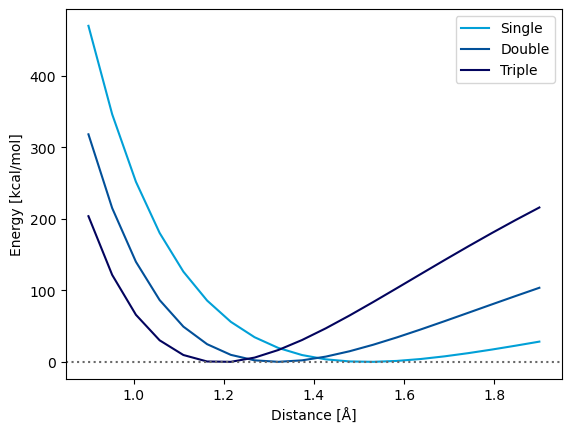

In [51]:
plt.plot(r_bond_order_scan, r_ethane_energies, color="#01a0d7", label="Single")
plt.plot(r_bond_order_scan, r_ethene_energies, color="#025099", label="Double")
plt.plot(r_bond_order_scan, r_ethyne_energies, color="#03045e", label="Triple")
plt.xlabel("Distance [Å]")
plt.ylabel("Energy [kcal/mol]")
plt.axhline(y=0, color="dimgrey", linestyle=":")
plt.legend()